In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
df=pd.read_csv("C:\\Users\\dobil\\OneDrive\\Desktop\\MACHINE-LEARNING\Knn\\credit_risk_dataset.csv")
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [13]:
df.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [14]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [15]:
for col in df.columns:
    if df[col].dtype=='object':
        df[col].fillna(df[col].mode()[0],inplace=True)
    else:
        df[col].fillna(df[col].median(),inplace=True)

C:\Users\dobil\AppData\Local\Temp\ipykernel_1588\1466086371.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(),inplace=True)
C:\Users\dobil\AppData\Local\Temp\ipykernel_1588\1466086371.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example,

In [16]:
df.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [17]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    return data[
        (data[column] >= Q1 - 1.5 * IQR) &
        (data[column] <= Q3 + 1.5 * IQR)
    ]

for col in ["person_age", "person_income"]:
    df = remove_outliers_iqr(df, col)


In [19]:
df_encoded = pd.get_dummies(
    df,
    columns=[
        'person_home_ownership',
        'loan_intent',
        'loan_grade',
        'cb_person_default_on_file'
    ],
    drop_first=True
)


In [21]:
x=df_encoded.drop('loan_status',axis=1)
y=df['loan_status']

In [43]:
feature_names=x.columns

In [44]:
# selected_features = [
#     'person_age',
#     'person_income',
#     'person_emp_length',
#     'loan_amnt',
#     'loan_int_rate',
#     'loan_percent_income',
#     'cb_person_cred_hist_length'
# ]
# selected_features += [
#     col for col in x.columns
#     if col.startswith('person_home_ownership_')
#     or col.startswith('loan_intent_')
#     or col.startswith('loan_grade_')
#     or col.startswith('cb_person_default_on_file_')
# ]

# x = x[selected_features]


In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
s=StandardScaler()
x_scaled=s.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)

In [46]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=25,metric="euclidean")
knn.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=25)

In [47]:
y_pred=knn.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print("Accuracy Score:",accuracy_score(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("classification Report:\n",classification_report(y_test,y_pred))

Accuracy Score: 0.8914401485733581
Confusion Matrix:
 [[4482   96]
 [ 547  798]]
classification Report:
               precision    recall  f1-score   support

           0       0.89      0.98      0.93      4578
           1       0.89      0.59      0.71      1345

    accuracy                           0.89      5923
   macro avg       0.89      0.79      0.82      5923
weighted avg       0.89      0.89      0.88      5923



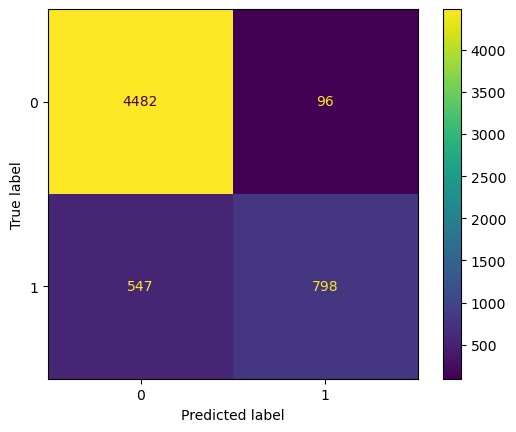

In [48]:
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay
cm=ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
plt.show()